# 발틱운임지수(BDI)와  해양운송업(팬오션, 대한해운)

해양운송업은 발틱운임지수(BDI)와 밀접한 관련이 있다. pandas_datareader을 사용하여 해양운송업의 두 종목의 가격과 BDI 데이터를 가져와 차트로 확인하고 상관계수도 구해본다.

<img src="http://img.hankyung.com/photo/201605/AA.11652791.1.jpg" >
이미지출처: (한국경제) https://goo.gl/iFgU4m 

<!-- TEASER_END -->
### 2017 http://financedata.kr

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)

# 해상운송업
* 벌크선, 탱커, 컨테이너선 3가지 형태로 분류
    
### 국내 해운사
* 벌크선, 탱커: 팬오션(028670)과 대한해운(005880)
* 컨테이너선: 현대상선(011200), 한진해운(2017-03-06 상장폐지)

# BDI, Baltic Dry Index
* BDI (Baltic Dry Index): 발틱 건화물(乾貨物) 운임 지수
* 1985년 1월 4일의 운임을 1000으로 볼 때 운임이 얼마나 내리고 올랐는지를 수치화한 것
* 벌크업황을 나타내는 대표적인 지표

데이터는 quandl 에서 구할 수 있다
* https://www.quandl.com/data/LLOYDS/BDI-Baltic-Dry-Index

# BDI 데이터 가져오기

pandas_datareader를 사용하여, 2010년 1월 부터 현재까지 BDI를 간편하게 가져올 수 있다

In [2]:
import pandas_datareader as pdr

# 2010년 1월 부터 현재까지 BDI
df_bdi = pdr.DataReader('LLOYDS/BDI', 'quandl')
df_bdi.head()

,Index
Date,
2017-11-06,1473.0
2017-11-03,1476.0
2017-11-02,1482.0
2017-11-01,1496.0
2017-10-31,1522.0


In [3]:
# 날짜 역순으로 되어 있어 인덱스인 'Data'로 소트 
df_bdi.sort_index(inplace=True)
df_bdi.head()

,Index
Date,
2010-01-04,3140.0
2010-01-05,3270.0
2010-01-06,3259.0
2010-01-07,3149.0
2010-01-08,3140.0


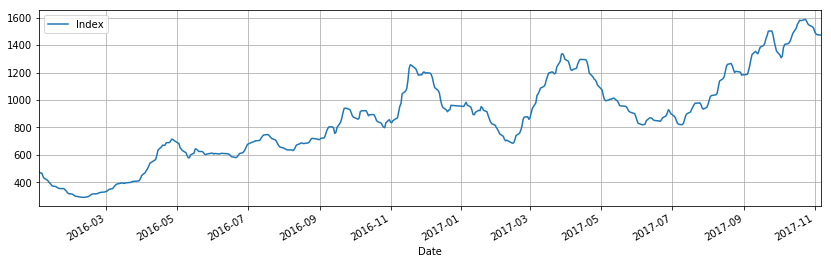

In [4]:
# 2016년 이후 BDI 
df_bdi['2016':].plot()

# 팬오션 주가

In [5]:
# 팬오션
df_pan = pdr.DataReader('028670.KS', 'yahoo')
df_pan.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,140000.0,141250.0,138750.0,141250.0,140997.765625,109223
2010-01-05,142500.0,150000.0,141250.0,150000.0,149732.140625,439173
2010-01-06,149375.0,151875.0,147500.0,150625.0,150356.015625,302577
2010-01-07,151875.0,166875.0,150000.0,156250.0,155970.984375,880208
2010-01-08,158125.0,165000.0,154375.0,163125.0,162833.703125,563491


# BDI지수 + 팬오션 주가

In [6]:
import pandas as pd

df = pd.DataFrame() # 빈 DataFrame 생성
df['BDI'] = df_bdi['Index']
df['Pan Ocean'] = df_pan['Adj Close']
df.sort_index(inplace=True)

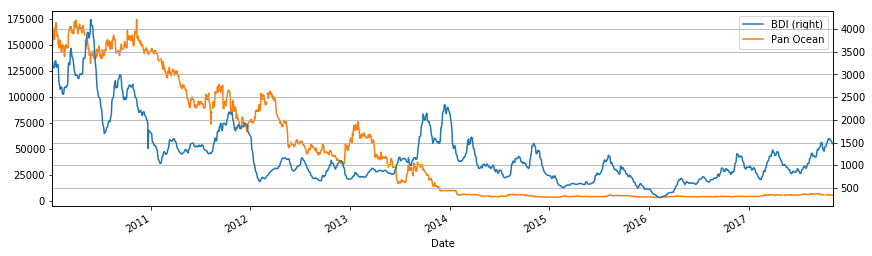

In [7]:
df.plot(secondary_y='BDI')

BDI	와 팬오션(Pan Ocean)의 수정종가사이의 상관계수를 구해본다. 0.74 상당히 높게 나온다.

In [8]:
df.corr()

,BDI,Pan Ocean
BDI,1.000000,0.740296
Pan Ocean,0.740296,1.000000


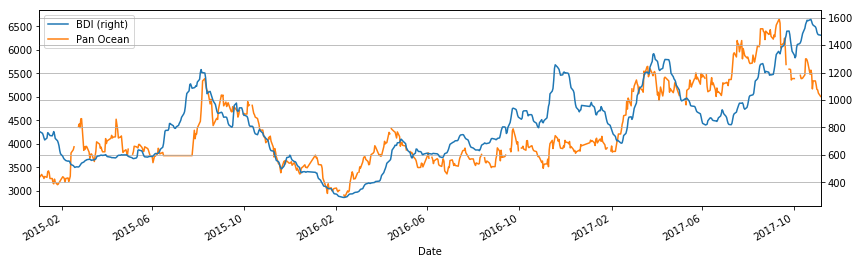

In [9]:
# 2015년 이후만 따로 뽑아 본다

df_2015 = df['2015':]
df_2015.plot(secondary_y='BDI')

In [10]:
df_2015.corr() # 0.737 상당히 높게 나온다

,BDI,Pan Ocean
BDI,1.000000,0.737314
Pan Ocean,0.737314,1.000000


# 대한해운에 대해 동일한 분석

대한해운(005880)에 대해 동일한 비교 분석을 해본다

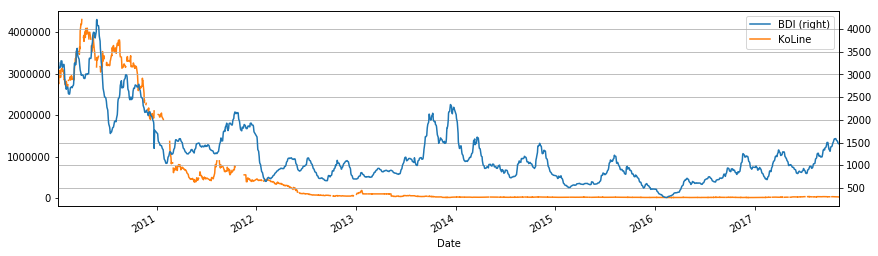

In [11]:
df_koline = pdr.DataReader('005880.KS', 'yahoo')
df_bdi = pdr.DataReader('LLOYDS/BDI', 'quandl')

df = pd.DataFrame() # 빈 DataFrame 생성
df['BDI'] = df_bdi['Index']
df['KoLine'] = df_koline['Adj Close']
df.sort_index(inplace=True)

df.plot(secondary_y='BDI')

In [12]:
df.corr()

,BDI,KoLine
BDI,1.000000,0.838375
KoLine,0.838375,1.000000


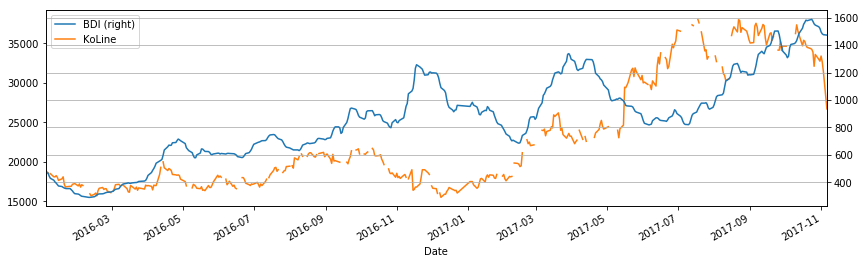

In [13]:
# 2016년 이후만 그려본다

df['2016':].plot(secondary_y='BDI')

# 참고자료
* https://goo.gl/Kogdq5 돈이 보이는 경제 지표 - 발틱운임지수(BDI) -- 중앙일보
* https://goo.gl/iFgU4m 2016-05-09 팬오션의 이유있는 순항 -- 한국경제
* https://goo.gl/9j3kTx 2017-07-20 "팬오션, 건화물선 운임지수(BDI) 개선되며 이익증가도 기대" - KB
* https://goo.gl/a4ypm3 2017-01-02 [Top-Down] BDI 지수와 해운산업, 대학원생 '옹쿠'의 공부하는 블로그

### 2017 http://financedata.kr